In [1]:
import warnings
import datetime
import itertools
import numpy as np
import scipy as sp
import cvxpy as cp
import pandas as pd
import yfinance as yf
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from functools import reduce
from kit import interval_dict, annualize_returns, annualize_vol, get_yf_ts, get_usd_mcap

warnings.filterwarnings('ignore')

Here we introduce a method to model the behaviour of returns over time. Geometric Brownian Motion (GBM) is a continuous-time stochastic process where the log of its quantity follows Brownian motion with drift. It is decomposed as the sum of the change of the average value of the process $\mu$ (drift rate) and a constant volatility $\sigma$ (shock). For a stock price $S_t$:
$$d S_t=S_t(\mu dt + \sigma\sqrt{dt}W_t)$$

In [2]:
def gbm(s_0=100, mu=0.07, sigma=0.15, freq=12, years=50, n_scenarios=100):
    dt = 1 / freq
    n_steps = int(years * freq)
    r = np.random.normal((1 + mu) ** dt, sigma * np.sqrt(dt), (n_steps, n_scenarios)) # Note, technically the Weiner process W_t is generated from the np.random.nromal call
    prices = s_0 * pd.DataFrame(r).cumprod()
    return prices

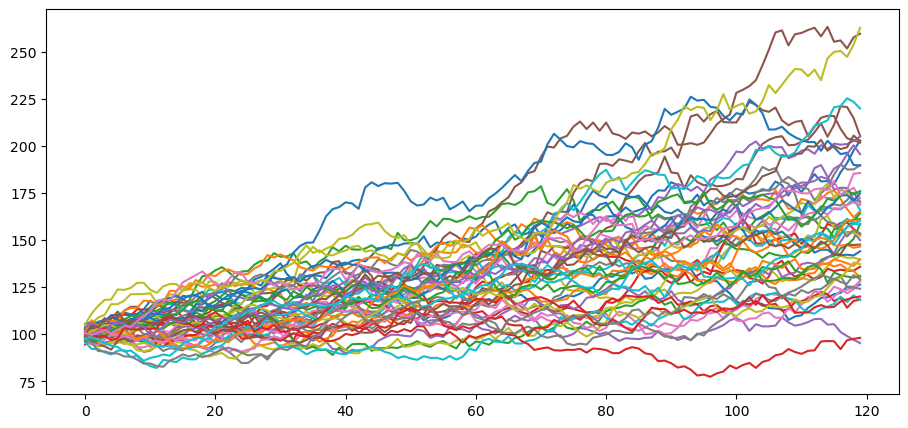

In [9]:
gbm(n_scenarios=50, mu=0.05, sigma=0.075, years=10).plot(legend=False, figsize=(11,5))
plt.show()

In [10]:
gbm_wrap = lambda mu, sigma, freq, years, n_scenarios: gbm(100, mu, sigma, freq, years, n_scenarios).plot(legend=False, figsize=(11,5))
widgets.interactive(gbm_wrap, mu=(0, 0.25, 0.01), sigma=(0, 0.35, 0.01), freq=(1, 12, 1), years=(2, 50, 1), n_scenarios=(1, 150, 1))

interactive(children=(FloatSlider(value=0.12, description='mu', max=0.25, step=0.01), FloatSlider(value=0.17, …